In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('drive/MyDrive/Emotion_classify_Data.csv', delimiter = ';')
df

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
...,...,...
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear


Exploratory Data Analysis

In [ ]:
# Check null data

df.isnull().values.any()

False

In [ ]:
# Check duplicated text

df[df["Comment"].duplicated()]

,Comment,Emotion
1930,i resorted to yesterday the post peak day of i...,fear
4869,i feel pretty tortured because i work a job an...,fear
5870,i feel like a tortured artist when i talk to her,fear


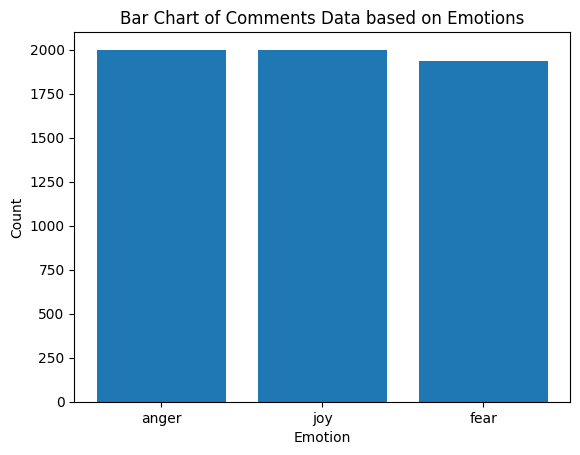

In [ ]:
# Visualization

import matplotlib.pyplot as plt

emotion = df['Emotion'].value_counts()

plt.bar(x = emotion.index, height = emotion.values)
plt.title('Bar Chart of Comments Data based on Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

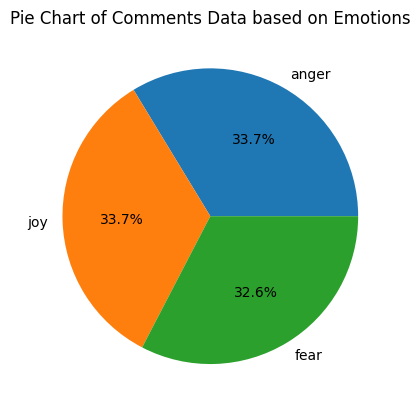

In [ ]:
plt.pie(emotion, labels = emotion.index, autopct = '%1.1f%%')
plt.title('Pie Chart of Comments Data based on Emotions')
plt.show()

Preprocessing

In [ ]:
# Preprocessing
import re

# case folding
df['Clean_comment'] = df['Comment'].str.lower()
# remove whitespace
df['Clean_comment'] = [re.sub(r'\s+',' ',i) for i in df['Clean_comment']]
# remove number
df['Clean_comment'] = [re.sub(r'\d+',' ',i) for i in df['Clean_comment']]
# remove non-alpha numeric characters
df['Clean_comment'] = [re.sub(r'[\W\s]',' ',i) for i in df['Clean_comment']]
df['Clean_comment']

0       i seriously hate one subject to death but now ...
1                      im so full of life i feel appalled
2       i sit here to write i start to dig out my feel...
3       ive been really angry with r and i feel like a...
4       i feel suspicious if there is no one outside l...
                              ...                        
5932                   i begun to feel distressed for you
5933    i left feeling annoyed and angry thinking that...
5934    i were to ever get married i d have everything...
5935    i feel reluctant in applying there because i w...
5936    i just wanted to apologize to you because i fe...
Name: Clean_comment, Length: 5937, dtype: object

In [ ]:
df

,Comment,Emotion,Clean_comment
0,i seriously hate one subject to death but now ...,fear,i seriously hate one subject to death but now ...
1,im so full of life i feel appalled,anger,im so full of life i feel appalled
2,i sit here to write i start to dig out my feel...,fear,i sit here to write i start to dig out my feel...
3,ive been really angry with r and i feel like a...,joy,ive been really angry with r and i feel like a...
4,i feel suspicious if there is no one outside l...,fear,i feel suspicious if there is no one outside l...
...,...,...,...
5932,i begun to feel distressed for you,fear,i begun to feel distressed for you
5933,i left feeling annoyed and angry thinking that...,anger,i left feeling annoyed and angry thinking that...
5934,i were to ever get married i d have everything...,joy,i were to ever get married i d have everything...
5935,i feel reluctant in applying there because i w...,fear,i feel reluctant in applying there because i w...


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Remove punctuations

In [ ]:
def remove_punctuations(text):
    punct = string.punctuation
    return text.translate(str.maketrans('', '', punct))

df['Clean_comment'] = df['Clean_comment'].apply(lambda text: remove_punctuations(text))
df['Clean_comment']

0       i seriously hate one subject to death but now ...
1                      im so full of life i feel appalled
2       i sit here to write i start to dig out my feel...
3       ive been really angry with r and i feel like a...
4       i feel suspicious if there is no one outside l...
                              ...                        
5932                   i begun to feel distressed for you
5933    i left feeling annoyed and angry thinking that...
5934    i were to ever get married i d have everything...
5935    i feel reluctant in applying there because i w...
5936    i just wanted to apologize to you because i fe...
Name: Clean_comment, Length: 5937, dtype: object

Tokenization

In [ ]:
def tokenization(text):
  token = word_tokenize(text)
  print(token)

tokenized_comment = df['Clean_comment'].apply(tokenization)
tokenized_comment

Streaming output truncated to the last 5000 lines.
['i', 'am', 'also', 'now', 'down', 'lbs', 'so', 'i', 'feel', 'so', 'good', 'i', 'still', 'have', 'another', 'to', 'go', 'at', 'least', 'well', 'thats', 'the', 'plan', 'anyway']
['i', 'feel', 'like', 'it', 's', 'going', 'to', 'be', 'something', 'shockingly', 'amazing']
['i', 'woke', 'up', 'feeling', 'all', 'frustrated', 'and', 'upset', 'again', 're', 'enacting', 'the', 'moment', 'i', 'had', 'to', 'succumb', 'to', 'the', 'docs', 'insults', 'and', 'arrogance', 'for', 'a', 'favor', 'to', 'clarify', 'truth', 'about', 'my', 'health']
['i', 'am', 'pleased', 'that', 'only', 'pgce', 'qualified', 'teachers', 'can', 'work', 'here', 'it', 'makes', 'the', 'effort', 'expense', 'to', 'gain', 'mine', 'feel', 'worthwhile']
['i', 'think', 'too', 'much', 'about', 'how', 'i', 'sit', 'how', 'my', 'voice', 'sounds', 'if', 'i', 've', 'gotten', 'any', 'food', 'on', 'my', 'mouth', 'and', 'the', 'feeling', 'that', 'i', 'need', 'to', 'make', 'my', 'way', 'around

0       None
1       None
2       None
3       None
4       None
        ... 
5932    None
5933    None
5934    None
5935    None
5936    None
Name: Clean_comment, Length: 5937, dtype: object

Filtering

In [ ]:
def filtering(text):
    token = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    token_without_sw = [word for word in token if word not in stop_words]
    return " ".join(token_without_sw)

df['Clean_comment'] = df['Clean_comment'].apply(filtering)
df

,Comment,Emotion,Clean_comment
0,i seriously hate one subject to death but now ...,fear,seriously hate one subject death feel reluctan...
1,im so full of life i feel appalled,anger,im full life feel appalled
2,i sit here to write i start to dig out my feel...,fear,sit write start dig feelings think afraid acce...
3,ive been really angry with r and i feel like a...,joy,ive really angry r feel like idiot trusting fi...
4,i feel suspicious if there is no one outside l...,fear,feel suspicious one outside like rapture happe...
...,...,...,...
5932,i begun to feel distressed for you,fear,begun feel distressed
5933,i left feeling annoyed and angry thinking that...,anger,left feeling annoyed angry thinking center stu...
5934,i were to ever get married i d have everything...,joy,ever get married everything ready offer got to...
5935,i feel reluctant in applying there because i w...,fear,feel reluctant applying want able find company...


In [ ]:
# One-hot encoding

label = {
    'fear': 0,
    'anger': 1,
    'joy': 2
}

encoded_label = [label[i] for i in df["Emotion"]]
df['Encoded_emotion'] = encoded_label
df

,Comment,Emotion,Clean_comment,Encoded_emotion
0,i seriously hate one subject to death but now ...,fear,seriously hate one subject death feel reluctan...,0
1,im so full of life i feel appalled,anger,im full life feel appalled,1
2,i sit here to write i start to dig out my feel...,fear,sit write start dig feelings think afraid acce...,0
3,ive been really angry with r and i feel like a...,joy,ive really angry r feel like idiot trusting fi...,2
4,i feel suspicious if there is no one outside l...,fear,feel suspicious one outside like rapture happe...,0
...,...,...,...,...
5932,i begun to feel distressed for you,fear,begun feel distressed,0
5933,i left feeling annoyed and angry thinking that...,anger,left feeling annoyed angry thinking center stu...,1
5934,i were to ever get married i d have everything...,joy,ever get married everything ready offer got to...,2
5935,i feel reluctant in applying there because i w...,fear,feel reluctant applying want able find company...,0


In [ ]:
max_sentence = int(df['Clean_comment'].str.split().str.len().max())
max_sentence

34

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['Clean_comment'], df['Encoded_emotion'], train_size = 0.8, random_state = 42, stratify = df['Encoded_emotion'])

Vectorization

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

vect = TextVectorization(max_tokens = 10000, output_mode = 'int', output_sequence_length = max_sentence)

In [ ]:
vect.adapt(x_train)

In [ ]:
pad_rev = vect(x_train)
print(pad_rev)

tf.Tensor(
[[ 255   62  571 ...    0    0    0]
 [ 241    3  180 ...    0    0    0]
 [2463   53  118 ...    0    0    0]
 ...
 [  33  375    2 ...    0    0    0]
 [   2  108  203 ...    0    0    0]
 [  26  171   63 ...    0    0    0]], shape=(4749, 34), dtype=int64)


In [ ]:
pad_rev.shape

TensorShape([4749, 34])

In [ ]:
token = TextVectorization()

max_sentence_len = max_sentence
embed_dim = 128
vocab_size = 10000

Classification

In [ ]:
# Create model

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Flatten, GRU

In [ ]:
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

def train_test_model(dropout, optimizer, model_class):
  model = Sequential ([
      Embedding(vocab_size, output_dim = 128, input_length = max_sentence_len, trainable = False),
      model_class(128, return_sequences = True),
      Dropout(dropout),
      Flatten(),
      Dense(3)
  ])

  print(model.summary())

  model.compile(optimizer = optimizer, loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ["accuracy"])

  ES = EarlyStopping(monitor = 'loss', patience = 4, restore_best_weights = True)

  model.fit(pad_rev, y_train, batch_size = 64, epochs = 50, callbacks = [ES])

  pad_rev_test = vect(x_test)

  predict = model.predict(pad_rev_test)
  y_pred = np.argmax(predict, axis = 1)
  y_pred

  print('\nClassification Report\n')
  print(classification_report(y_test, y_pred))

  print("Accuracy: ", accuracy_score(y_test, y_pred))
  print("Precision: ", precision_score(y_test, y_pred, average = 'micro'))
  print("Recall: ", recall_score(y_test, y_pred, average = 'micro'))
  print("F1-score: ", f1_score(y_test, y_pred, average = 'micro'))

  print('\nConfusion Matrix\n')
  print(confusion_matrix(y_test, y_pred))

In [ ]:
train_test_model(dropout = 0.1, optimizer = "sgd", model_class = GRU)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 34, 128)           99072     
                                                                 
 dropout (Dropout)           (None, 34, 128)           0         
                                                                 
 flatten (Flatten)           (None, 4352)              0         
                                                                 
 dense (Dense)               (None, 3)                 13059     
                                                                 
Total params: 1392131 (5.31 MB)
Trainable params: 112131 (438.01 KB)
Non-trainable params: 1280000 (4.88 MB)
_________________________________________________________________
None
Epoch 1/

In [ ]:
train_test_model(dropout = 0.1, optimizer = "adam", model_class = GRU)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 34, 128)           1280000   
                                                                 
 gru_1 (GRU)                 (None, 34, 128)           99072     
                                                                 
 dropout_1 (Dropout)         (None, 34, 128)           0         
                                                                 
 flatten_1 (Flatten)         (None, 4352)              0         
                                                                 
 dense_1 (Dense)             (None, 3)                 13059     
                                                                 
Total params: 1392131 (5.31 MB)
Trainable params: 112131 (438.01 KB)
Non-trainable params: 1280000 (4.88 MB)
_________________________________________________________________
None
Epoch 

In [ ]:
train_test_model(dropout = 0.2, optimizer = "sgd", model_class = GRU)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 34, 128)           1280000   
                                                                 
 gru_2 (GRU)                 (None, 34, 128)           99072     
                                                                 
 dropout_2 (Dropout)         (None, 34, 128)           0         
                                                                 
 flatten_2 (Flatten)         (None, 4352)              0         
                                                                 
 dense_2 (Dense)             (None, 3)                 13059     
                                                                 
Total params: 1392131 (5.31 MB)
Trainable params: 112131 (438.01 KB)
Non-trainable params: 1280000 (4.88 MB)
_________________________________________________________________
None
Epoch 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
train_test_model(dropout = 0.2, optimizer = "adam", model_class = GRU)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 34, 128)           1280000   
                                                                 
 gru_3 (GRU)                 (None, 34, 128)           99072     
                                                                 
 dropout_3 (Dropout)         (None, 34, 128)           0         
                                                                 
 flatten_3 (Flatten)         (None, 4352)              0         
                                                                 
 dense_3 (Dense)             (None, 3)                 13059     
                                                                 
Total params: 1392131 (5.31 MB)
Trainable params: 112131 (438.01 KB)
Non-trainable params: 1280000 (4.88 MB)
_________________________________________________________________
None
Epoch 

In [ ]:
train_test_model(dropout = 0.1, optimizer = "sgd", model_class = LSTM)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 34, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 34, 128)           131584    
                                                                 
 dropout_4 (Dropout)         (None, 34, 128)           0         
                                                                 
 flatten_4 (Flatten)         (None, 4352)              0         
                                                                 
 dense_4 (Dense)             (None, 3)                 13059     
                                                                 
Total params: 1424643 (5.43 MB)
Trainable params: 144643 (565.01 KB)
Non-trainable params: 1280000 (4.88 MB)
_________________________________________________________________
None
Epoch 

In [ ]:
train_test_model(dropout = 0.2, optimizer = "sgd", model_class = LSTM)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 34, 128)           1280000   
                                                                 
 lstm_1 (LSTM)               (None, 34, 128)           131584    
                                                                 
 dropout_5 (Dropout)         (None, 34, 128)           0         
                                                                 
 flatten_5 (Flatten)         (None, 4352)              0         
                                                                 
 dense_5 (Dense)             (None, 3)                 13059     
                                                                 
Total params: 1424643 (5.43 MB)
Trainable params: 144643 (565.01 KB)
Non-trainable params: 1280000 (4.88 MB)
_________________________________________________________________
None
Epoch 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
train_test_model(dropout = 0.1, optimizer = "adam", model_class = LSTM)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 34, 128)           1280000   
                                                                 
 lstm_2 (LSTM)               (None, 34, 128)           131584    
                                                                 
 dropout_6 (Dropout)         (None, 34, 128)           0         
                                                                 
 flatten_6 (Flatten)         (None, 4352)              0         
                                                                 
 dense_6 (Dense)             (None, 3)                 13059     
                                                                 
Total params: 1424643 (5.43 MB)
Trainable params: 144643 (565.01 KB)
Non-trainable params: 1280000 (4.88 MB)
_________________________________________________________________
None
Epoch 

In [ ]:
train_test_model(dropout = 0.2, optimizer = "adam", model_class = LSTM)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 34, 128)           1280000   
                                                                 
 lstm_3 (LSTM)               (None, 34, 128)           131584    
                                                                 
 dropout_7 (Dropout)         (None, 34, 128)           0         
                                                                 
 flatten_7 (Flatten)         (None, 4352)              0         
                                                                 
 dense_7 (Dense)             (None, 3)                 13059     
                                                                 
Total params: 1424643 (5.43 MB)
Trainable params: 144643 (565.01 KB)
Non-trainable params: 1280000 (4.88 MB)
_________________________________________________________________
None
Epoch 